In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ema_workbench.util import load_results

In [3]:
results1 = load_results(r'constant-policies.tar.gz')
experiments1, outcomes1 = results1

#I've used ArrayOutcomes where I should have used TImeSeries (dunno if that was at all possible)
#so now I need to make a new array where I take the averages for each scenario at least

#print(outcomes1['Uncertainty over Time'])
avg_unc_time = []

for i in range(0,outcomes1['Uncertainty over Time'].shape[0]):
    data = outcomes1['Uncertainty over Time'][i]
    #print([sum(e)/len(e) for e in zip(*data)])
    avg_unc_time.append([sum(e)/len(e) for e in zip(*data)])

    
print(len(avg_unc_time))
outcomes1['Avg Uncertainty over Time'] = np.array(avg_unc_time)
print(outcomes1['Avg Uncertainty over Time'][0])

7500
[1.         0.99041667 0.98252083 0.9573125  0.92504485 0.90080276
 0.86840213 0.84484661 0.83060656 0.80580019 0.78144612 0.75158306
 0.71863538 0.6899174  0.66218465 0.6357845  0.61129789 0.58336656
 0.55390423 0.52130323 0.49323126 0.46472654 0.43739293 0.4179467
 0.40216512 0.38831892]


C:\Users\Emma\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


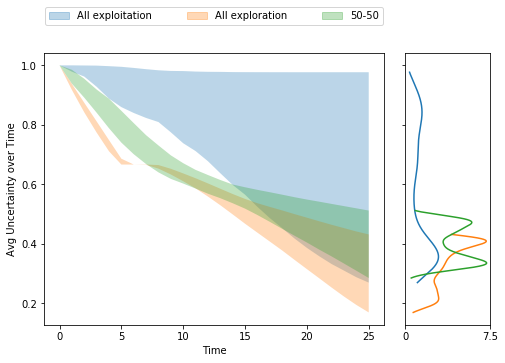

In [4]:
import matplotlib.pyplot as plt

#from expWorkbench import load_results
from ema_workbench.analysis.plotting import envelopes, lines, Density
import ema_workbench.analysis.plotting_util as plottingUtil
from numpy import array

plottingUtil.TIGHT= True

policies = experiments1['policy']
#print(policies)

outcomes1['TIME'] = np.array([i for i in range(0,26)],  ndmin=2)
#print(outcomes1['TIME'][0,:])

#print(outcomes2)

# make an envelope
fig, axesdict = envelopes(experiments1, outcomes1,
                outcomes_to_show=['Avg Uncertainty over Time'], 
                group_by='policy', 
                grouping_specifiers=['All exploitation', 'All exploration', '50-50'],
                legend=True,
                density=Density.KDE, fill=True,titles=None)

# set the size of the figure to look reasonable nice
fig.set_size_inches(8,5)

In [5]:
final_uncertainty = []
for i in range(0, outcomes1['Avg Uncertainty over Time'].shape[0]):
    final_uncertainty.append(outcomes1['Avg Uncertainty over Time'][i][-1])
    
outcomes1['final uncertainty'] = np.array(final_uncertainty)

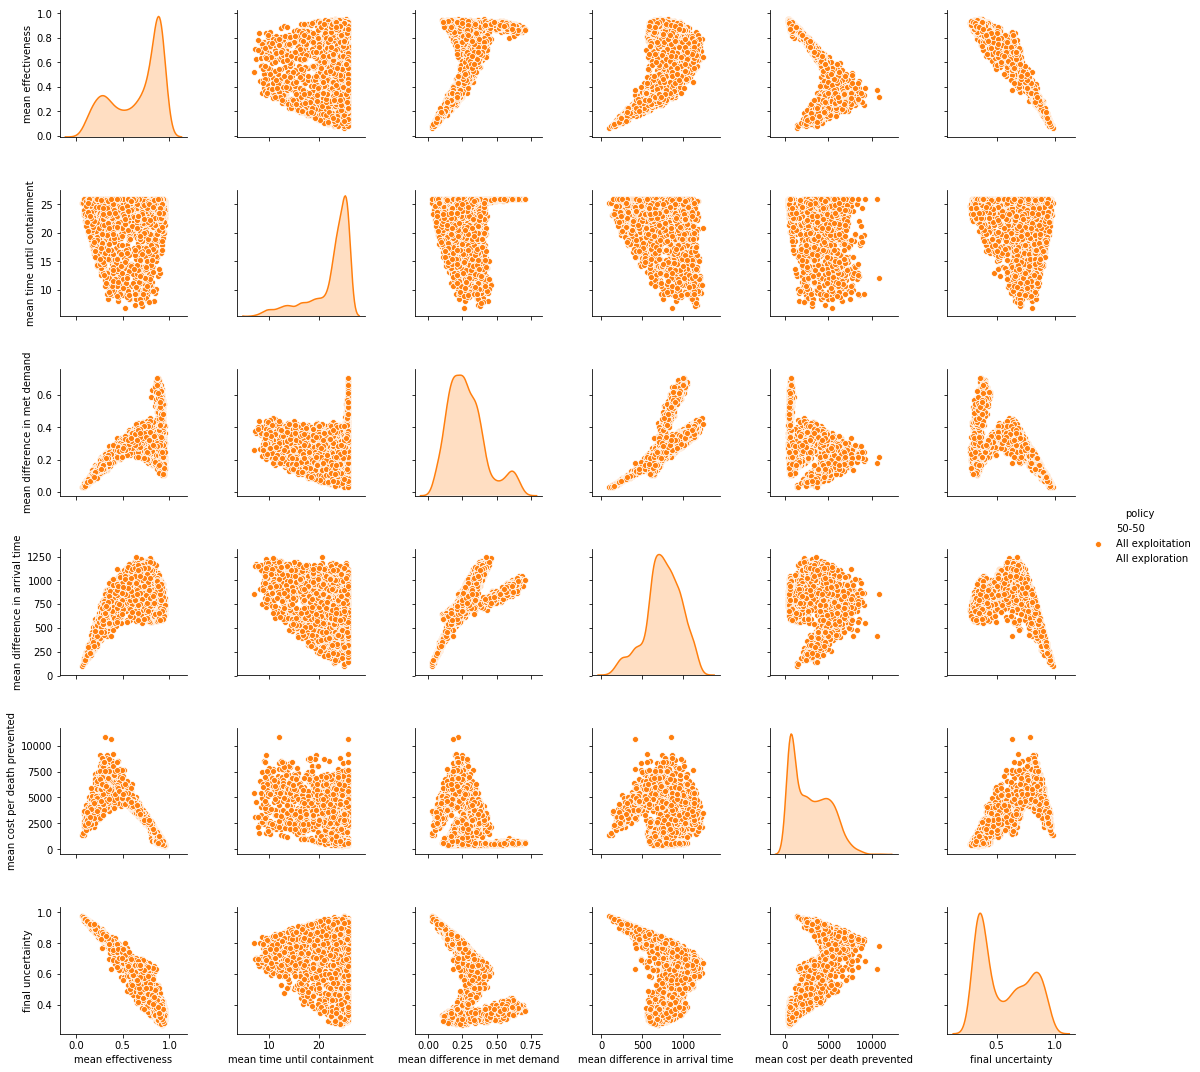

In [12]:

#print(outcomes1)

policies = experiments1['policy']

#all objectives are minimized, so the model outcome for effectiveness is negative
#flip the sign to make it easier to understand (as high effectiveness is desirable!)
outcomes1['mean effectiveness'] = [ -x for x in outcomes1['mean effectiveness']]


#the ArrayOutcomes aren't suitable for this type of analysis, so make a subselection without them
oneDkeys = ['mean effectiveness', 'mean time until containment', 'mean difference in met demand',
            'mean difference in arrival time', 'mean cost per death prevented', 'final uncertainty']
data = pd.DataFrame.from_dict(dict((k, outcomes1[k]) for k in oneDkeys if k in outcomes1))


data['policy'] = policies

sns.pairplot(data.loc[data['policy'] == 'All exploitation'], hue='policy',  vars=oneDkeys, )
plt.show()

### Now let's look at the actual policies ###

In [13]:
results2 = load_results(r'policies-functions.tar.gz')
experiments2, outcomes2 = results2

#I've used ArrayOutcomes where I should have used TImeSeries (dunno if that was at all possible)
#so now I need to make a new array where I take the averages for each scenario at least

#print(outcomes1['Uncertainty over Time'])
avg_unc_time = []

for i in range(0,outcomes2['Uncertainty over Time'].shape[0]):
    data = outcomes2['Uncertainty over Time'][i]
    #print([sum(e)/len(e) for e in zip(*data)])
    avg_unc_time.append([sum(e)/len(e) for e in zip(*data)])

    
print(len(avg_unc_time))
outcomes2['Avg Uncertainty over Time'] = np.array(avg_unc_time)
print(outcomes2['Avg Uncertainty over Time'].shape)

12500
(12500, 26)


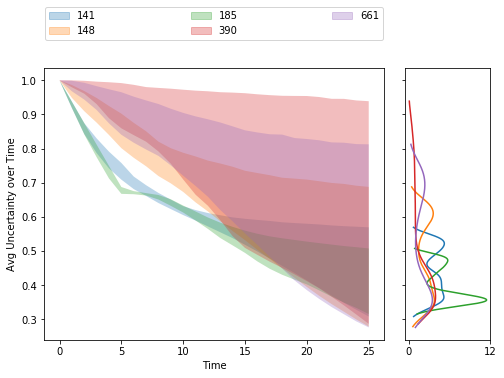

In [14]:
import matplotlib.pyplot as plt

#from expWorkbench import load_results
from ema_workbench.analysis.plotting import envelopes, lines, Density
import ema_workbench.analysis.plotting_util as plottingUtil
from numpy import array

plottingUtil.TIGHT= True

policies = experiments2['policy']
#print(policies)

outcomes2['TIME'] = np.array([i for i in range(0,26)],  ndmin=2)
#print(outcomes1['TIME'][0,:])

#print(outcomes2)

# make an envelope
fig, axesdict = envelopes(experiments2, outcomes2,
                outcomes_to_show=['Avg Uncertainty over Time'], 
                group_by='policy', 
                
                legend=True,
                density=Density.KDE, fill=True,titles=None)

# set the size of the figure to look reasonable nice
fig.set_size_inches(8,5)

In [15]:

final_uncertainty = []
for i in range(0, outcomes2['Avg Uncertainty over Time'].shape[0]):
    final_uncertainty.append(outcomes2['Avg Uncertainty over Time'][i][-1])
    
outcomes2['final uncertainty'] = np.array(final_uncertainty)

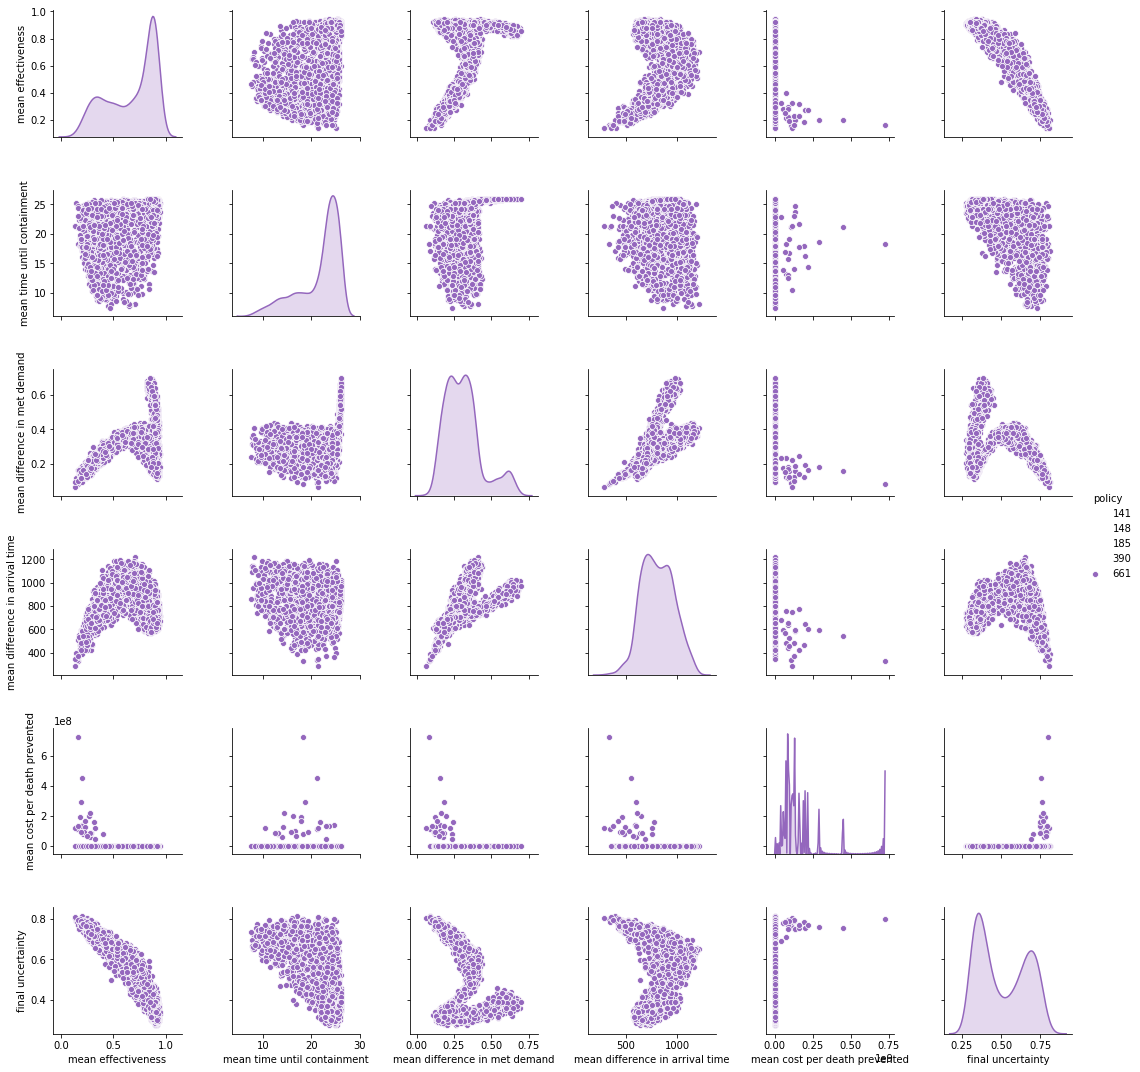

In [20]:
policies = experiments2['policy']

#all objectives are minimized, so the model outcome for effectiveness is negative
#flip the sign to make it easier to understand (as high effectiveness is desirable!)
outcomes2['mean effectiveness'] = [ -x for x in outcomes2['mean effectiveness']]


#the ArrayOutcomes aren't suitable for this type of analysis, so make a subselection without them
oneDkeys = ['mean effectiveness', 'mean time until containment', 'mean difference in met demand',
            'mean difference in arrival time', 'mean cost per death prevented', 'final uncertainty']
data = pd.DataFrame.from_dict(dict((k, outcomes2[k]) for k in oneDkeys if k in outcomes2))


data['policy'] = policies

sns.pairplot(data.loc[data['policy'] == 661], hue='policy',  vars=oneDkeys,)
plt.show()